<a href="https://colab.research.google.com/github/gna-rus/EXP_analysis/blob/main/EXP_all_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В рамках этого блокнота происходит обработка всех оптических результатов и слияние их с электрическими результатами в одну таблицу

In [ ]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

pd.options.mode.copy_on_write = True


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Задаю центры для виртуальных ячеек
df_with_etalon_XY = pd.DataFrame()

df_with_etalon_XY['X'] = [50000,  185000,  310000, 14000,  14000,  14000, 85000, 85000, 85000, 145000, 145000, 145000, 210000, 210000, 210000, 290000, 290000, 290000, 350000, 350000, 350000, 410000, 410000, 410000]
df_with_etalon_XY['Y'] = [10000,  10000,  10000,  90000,  190000,  290000, 90000, 190000, 290000, 90000, 190000, 290000, 90000, 190000, 290000, 90000,  190000, 295000, 100000,  190000, 290000, 90000, 190000, 290000]

In [ ]:
# Функция для модернизации таблиц (подвязывает каждое измерение к определенной области на панели)
def fun_Num_of_square(df, dict_df):
  count = 0
  for i in range(len(df)):
    for j in range(len(dict_df)):

      if (abs(df['X'].iloc[i] - dict_df['X'].iloc[j])<20000) and (abs(df['Y'].iloc[i] - dict_df['Y'].iloc[j])<40000):
        count += 1
        df.at[i, 'Num_of_square']=f'{dict_df["X"].loc[j]},{dict_df["Y"].loc[j]}'
        # df['Num_of_square'].loc[i] = f'{dict_df["X"].loc[j]},{dict_df["Y"].loc[j]}'
        break

      if (abs(df['X'].iloc[i] - dict_df['X'].iloc[j])<40000) and (abs(df['Y'].iloc[i] - dict_df['Y'].iloc[j])<20000):
        count += 1
        df.at[i, 'Num_of_square']= f'{dict_df["X"].iloc[j]},{dict_df["Y"].iloc[j]}'
        # df['Num_of_square'].loc[i] = f'{dict_df["X"].loc[j]},{dict_df["Y"].loc[j]}'
        break

  return df

Цель кода: создать скрипт, который автоматически извлекал все таблицы оптических измерений из папки, редактировал каждую из них и в конечном счете обьединял бы с таблицей электрических измерний

In [ ]:
# Создаю список всех адресов файлов с которым необходимо работать
list_all_adres, list_res = [], []
for root, dirs, files in os.walk('/content/drive/MyDrive/for_EXP/optic'):
    for file in files:
        if file.endswith('.xlsx') and ('-D-CD/' not in str(file)):
            list_all_adres.append(os.path.join(root, file))

for i in range(len(list_all_adres)):
  if '-E-CD' in list_all_adres[i]:
    list_res.append(list_all_adres[i])
list_res

['/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP72^EXP72     - 4  _20240216114250_25/EXP72^EXP72     - 13  _20240216114250_25.xlsx',
 '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP69^EXP69     - 3  _20240129152122_25/EXP69^EXP69     - 12  _20240129152122_25.xlsx',
 '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP74^EXP74     - 2  _20240229112528_25/EXP74^EXP74     - 11  _20240229112528_25.xlsx',
 '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP74^EXP74     - 1  _20240229112125_25/EXP74^EXP74     - 10  _20240229112125_25.xlsx',
 '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP74^EXP74     - 3  _20240229112932_25/EXP74^EXP74     - 12  _20240229112932_25.xlsx',
 '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP74^EXP74     - 4  _20240229113335_25/EXP74^EXP74     - 13  _20240229113335_25.xlsx',
 '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP80^EXP80     - 1  _20240417112151_25/EXP80^EXP80     - 13  _20240417112151_25.xlsx',
 '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/

In [ ]:
# Создаю словарь <название лота и измерения> - <ссылка на файл>
dict_of_name_and_adres = {}
for i in range(len(list_res)):
  str_of_name = list_res[i].split('/')[6:8]
  name = str_of_name[1].replace(" ", "")[6:13] + " " + str_of_name[0]

  dict_of_name_and_adres[name] = list_res[i]

In [ ]:
dict_of_name_and_adres

{'EXP72-4 SD1-E-CD': '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP72^EXP72     - 4  _20240216114250_25/EXP72^EXP72     - 13  _20240216114250_25.xlsx',
 'EXP69-3 SD1-E-CD': '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP69^EXP69     - 3  _20240129152122_25/EXP69^EXP69     - 12  _20240129152122_25.xlsx',
 'EXP74-2 SD1-E-CD': '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP74^EXP74     - 2  _20240229112528_25/EXP74^EXP74     - 11  _20240229112528_25.xlsx',
 'EXP74-1 SD1-E-CD': '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP74^EXP74     - 1  _20240229112125_25/EXP74^EXP74     - 10  _20240229112125_25.xlsx',
 'EXP74-3 SD1-E-CD': '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP74^EXP74     - 3  _20240229112932_25/EXP74^EXP74     - 12  _20240229112932_25.xlsx',
 'EXP74-4 SD1-E-CD': '/content/drive/MyDrive/for_EXP/optic/SD1-E-CD/EXP74^EXP74     - 4  _20240229113335_25/EXP74^EXP74     - 13  _20240229113335_25.xlsx',
 'EXP80-1 SD1-E-CD': '/content/drive/MyDrive/for_EXP/optic/SD1-E

In [ ]:
# создаю словарь таблиц!
dict_of_all_df = {}
for i in dict_of_name_and_adres:
  dict_of_all_df[i] =  pd.read_excel(dict_of_name_and_adres[i])

In [ ]:
# функция для автоматической корректировки таблицы оптических измерений
def fun_for_XY(row):
  list1 = row['Coordinates'].split(' ')
  row['X'] = int(list1[1][2:]) + 210000 # смещаю нулевую точку
  row['Y'] = int(list1[0][2:]) + 170000
  return row

def generate_df(df):
  """
  Удаляю лишние столбцы и строки
  """
  list_of_columns = df.columns.values.tolist()[3:]
  try:
    df = df.drop(list_of_columns, axis = 1)
    head = df.loc[2]
    df.rename(columns=head, inplace=True)
    df = df.loc[3:27].reset_index(drop=True)
    df = df.apply(fun_for_XY, axis=1)
    # df = df.drop(['Coordinates', 'CDMeasureType'], axis = 1)

  except:
    print(f'error {df.info()}')
  return df

In [ ]:
new_dict_of_all_df = {}

for i in dict_of_all_df:
  new_df = pd.DataFrame()
  new_df = generate_df(dict_of_all_df[i]) # отправляю каждое значение словаря таблиц на модернизацию

  new_dict_of_all_df[i] = new_df

In [ ]:
new_dict_of_all_df['EXP74-1 ME1-E-CD']

,CDMeasureType,Line,Coordinates,X,Y
0,1,4.723,X:-159417 Y:-196676,13324,10583
1,2,4.631,X:-159416 Y:-56679,153321,10584
2,3,4.862,X:-159416 Y:63321,273321,10584
3,4,5.175,X:-159415 Y:203318,413318,10585
4,5,4.545,X:-99412 Y:-116676,93324,70588
5,6,4.548,X:-99410 Y:3325,213325,70590
6,7,4.882,X:-99411 Y:143323,353323,70589
7,8,4.920,X:-57461 Y:-66674,143326,112539
8,9,5.446,X:-57460 Y:73325,283325,112540
9,10,4.895,X:-51410 Y:-196678,13322,118590


In [ ]:
# Анализ значения line для IGZO_E_CD
def inspection_IGZO_E_CD(df):
  mean_line = 5.5 # среднее значение
  diff_line = 1.5 # критическое отклонение

  res = mean_line -  df['Line']
  if abs(res) > diff_line:
    df['result'] = 0
  else:
    df['result'] = 1
  df['err_result'] = res
  df['line_IGZO_E_CD'] = df['Line']
  # df['err_result'].fillna(0)
  return df

# Анализ значения line для ME1_E_CD
def inspection_ME1_E_CD(df):
  mean_line = 5.1
  diff_line = 0.9
  res = mean_line -  df['Line']
  if abs(res) > diff_line:
    df['result'] = 0
  else:
    df['result'] = 1
  df['err_result'] = res
  df['line_ME1_E_CD'] = df['Line']
  # df['err_result'].fillna(0)
  return df

# Анализ значения line для SD1_E_CD
def inspection_SD1_E_CD(df):
  mean_line = 4.8
  diff_line = 0.9
  res = mean_line -  df['Line']
  if abs(res) > diff_line:
    df['result'] = 0
  else:
    df['result'] = 1
  df['err_result'] = res
  df['line_SD1_E_CD'] = df['Line']
  # df['err_result'].fillna(0)
  return df

# Анализ значения line для VI1_E_CD
def inspection_VI1_E_CD(df):
  mean_line = 7.1
  diff_line = 2.4
  res = mean_line - float(df['Line'])
  if abs(res) > diff_line:
    df['result'] = 0
  else:
    df['result'] = 1
  df['err_result'] = res
  df['line_VI1_E_CD'] = df['Line']
  # df['err_result'].fillna(0)
  return df

In [ ]:
new_dict_of_all_df.keys()

dict_keys(['EXP72-4 SD1-E-CD', 'EXP69-3 SD1-E-CD', 'EXP74-2 SD1-E-CD', 'EXP74-1 SD1-E-CD', 'EXP74-3 SD1-E-CD', 'EXP74-4 SD1-E-CD', 'EXP80-1 SD1-E-CD', 'EXP75-1 SD1-E-CD', 'EXP75-2 SD1-E-CD', 'EXP74-3 VI1-E-CD', 'EXP74-1 VI1-E-CD', 'EXP72-4 VI1-E-CD', 'EXP69-3 VI1-E-CD', 'EXP74-4 VI1-E-CD', 'EXP74-2 VI1-E-CD', 'EXP75-2 VI1-E-CD', 'EXP75-1 VI1-E-CD', 'EXP80-1 VI1-E-CD', 'EXP69-3 ME1-E-CD', 'EXP72-4 ME1-E-CD', 'EXP75-2 ME1-E-CD', 'EXP80-1 ME1-E-CD', 'EXP74-1 ME1-E-CD', 'EXP74-3 ME1-E-CD', 'EXP75-1 ME1-E-CD', 'EXP74-4 ME1-E-CD', 'EXP74-2 ME1-E-CD', 'EXP69-3 IGZO-E-CD', 'EXP72-4 IGZO-E-CD', 'EXP74-1 IGZO-E-CD', 'EXP74-3 IGZO-E-CD', 'EXP74-2 IGZO-E-CD', 'EXP74-4 IGZO-E-CD', 'EXP75-1 IGZO-E-CD', 'EXP75-2 IGZO-E-CD', 'EXP80-1 IGZO-E-CD'])

In [ ]:
# Создаю колонку средних значений для каждой группы оптических измерений по всей подложке (в рамках одного типа измерений)
for i in new_dict_of_all_df:
  new_dict_of_all_df[i][f'res_mean_on_glass_{i.split(" ")[1]}'] = new_dict_of_all_df[i]['Line'].astype(float).mean() # вывожу среднее значение по всему стеклу
  new_dict_of_all_df[i]['Line'] = new_dict_of_all_df[i]['Line'].astype(float)
  # new_dict_of_all_df[i]['Line'].fillna(0)
  # new_dict_of_all_df[i][f'res_err_{i.split(" ")[1]}'] = 5 - new_dict_of_all_df[i]['Line']  # ПЕРЕДЕЛАТЬ! надо не от 5 а от "средней статической велечины"


In [ ]:
new_dict_of_all_df['EXP69-3 SD1-E-CD']

,CDMeasureType,Line,Coordinates,X,Y,res_mean_on_glass_SD1-E-CD
0,1,4.862,X:-160980 Y:-194812,15188,9020,5.273909
1,2,4.787,X:-160979 Y:-54815,155185,9021,5.273909
2,3,5.026,X:-160979 Y:65184,275184,9021,5.273909
3,4,5.364,X:-160979 Y:205182,415182,9021,5.273909
4,5,4.673,X:-100973 Y:-114817,95183,69027,5.273909
5,6,4.911,X:-100973 Y:5186,215186,69027,5.273909
6,7,4.846,X:-100973 Y:145185,355185,69027,5.273909
7,8,5.980,X:-59023 Y:-64811,145189,110977,5.273909
8,9,NaN,X:-59023 Y:75187,285187,110977,5.273909
9,10,5.066,X:-52972 Y:-194816,15184,117028,5.273909


In [ ]:
new_dict_of_all_df['EXP74-2 IGZO-E-CD']

,CDMeasureType,Line,Coordinates,X,Y,res_mean_on_glass_IGZO-E-CD
0,1,4.702,X:-160216 Y:-197580,12420,9784,5.053714
1,2,4.384,X:-160216 Y:-57582,152418,9784,5.053714
2,3,4.456,X:-160216 Y:62414,272414,9784,5.053714
3,4,NaN,X:-160216 Y:202414,412414,9784,5.053714
4,5,5.033,X:-100216 Y:-117585,92415,69784,5.053714
5,6,5.335,X:-100216 Y:2416,212416,69784,5.053714
6,7,5.118,X:-100216 Y:142419,352419,69784,5.053714
7,8,5.149,X:-58266 Y:-67579,142421,111734,5.053714
8,9,5.284,X:-58266 Y:72424,282424,111734,5.053714
9,10,5.025,X:-52216 Y:-197583,12417,117784,5.053714


In [ ]:
# Провожу анализ и присваиваю OK или NG
for i in new_dict_of_all_df:
  new_dict_of_all_df[i]['result'] = ' '
  new_dict_of_all_df[i]['err_result'] = 0
  if 'SD1-E-CD' in i:
    new_dict_of_all_df[i] = new_dict_of_all_df[i].apply(inspection_SD1_E_CD, axis=1)

  if 'VI1-E-CD' in i:
    new_dict_of_all_df[i] = new_dict_of_all_df[i].apply(inspection_VI1_E_CD, axis=1)

  elif 'ME1-E-CD' in i:
    new_dict_of_all_df[i] = new_dict_of_all_df[i].apply(inspection_ME1_E_CD, axis=1)

  elif 'IGZO-E-CD' in i:
    new_dict_of_all_df[i] = new_dict_of_all_df[i].apply(inspection_IGZO_E_CD, axis=1)

In [ ]:
new_dict_of_all_df['EXP80-1 IGZO-E-CD']

,CDMeasureType,Line,Coordinates,X,Y,res_mean_on_glass_IGZO-E-CD,result,err_result,line_IGZO_E_CD
0,1,5.019,X:-160216 Y:-197580,12420,9784,5.062455,1,0.481,5.019
1,2,4.858,X:-160216 Y:-57582,152418,9784,5.062455,1,0.642,4.858
2,3,4.859,X:-160216 Y:62414,272414,9784,5.062455,1,0.641,4.859
3,4,4.689,X:-160216 Y:202414,412414,9784,5.062455,1,0.811,4.689
4,5,NaN,X:-100216 Y:-117585,92415,69784,5.062455,1,NaN,NaN
5,6,5.407,X:-100216 Y:2416,212416,69784,5.062455,1,0.093,5.407
6,7,5.246,X:-100216 Y:142419,352419,69784,5.062455,1,0.254,5.246
7,8,5.257,X:-58266 Y:-67579,142421,111734,5.062455,1,0.243,5.257
8,9,5.265,X:-58266 Y:72424,282424,111734,5.062455,1,0.235,5.265
9,10,4.922,X:-52216 Y:-197583,12417,117784,5.062455,1,0.578,4.922


# **Подключаю таблицу с электрическими измерениями RC и TFT**

In [ ]:
# Загружаю таблицу электронных измерений
df_merge_RC_TFT_Ref4_SiN =  pd.read_csv('/content/drive/MyDrive/for_EXP/Merge_RC_TFT.csv')
df_merge_RC_TFT_Ref4_SiN['Lot-panel'].value_counts()

Lot-panel
EXP69-3    1807
EXP72-4    1807
EXP74-1    1807
EXP74-2    1807
EXP74-3    1807
EXP74-4    1807
EXP75-1     312
EXP75-2     312
EXP80-1     299
Name: count, dtype: int64

In [ ]:
# трансформирую значения колонки под float
df_merge_RC_TFT_Ref4_SiN['Sheet resistance'] = df_merge_RC_TFT_Ref4_SiN['Sheet resistance'].str.replace(',', '.').astype(float)

In [ ]:
# Фильтрую таблицу с электрическими измерениями
df_merge_RC_TFT_Ref4_SiN = df_merge_RC_TFT_Ref4_SiN.drop(['Leakage current', 'Bake', 'Unnamed: 0', 'my_id', 'X_SUSS', 'Y_SUSS',
                                                          'X_PRB', 'Y_PRB', 'XY', 'Panel', 'Anneal', 'Regime', 'Vfix'] , axis = 1)

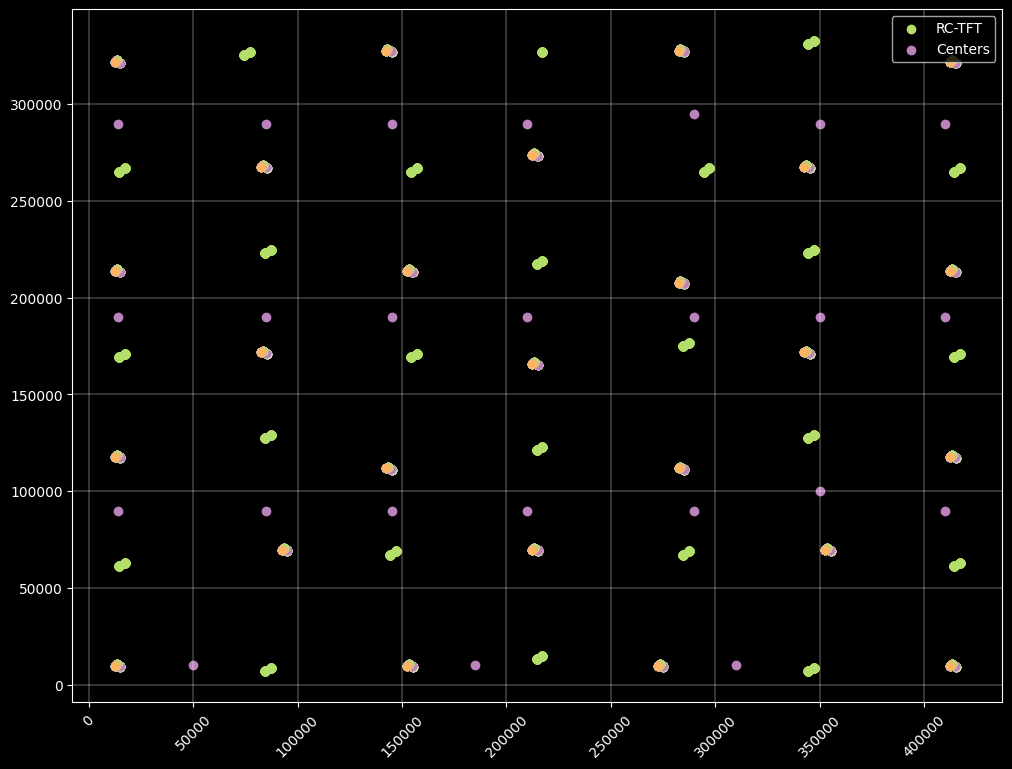

In [ ]:
# Создаю график с реальным расположением оптически, электрических измерений и центров вируальных зон к которым и буду привязывать точки измерений
fig, ax = plt.subplots(figsize=(12,9))


for i in new_dict_of_all_df:
  plt.scatter(new_dict_of_all_df[i]['X'], new_dict_of_all_df[i]['Y'])

plt.scatter(df_merge_RC_TFT_Ref4_SiN['X'], df_merge_RC_TFT_Ref4_SiN['Y'], label='RC-TFT')

plt.scatter(df_with_etalon_XY['X'], df_with_etalon_XY['Y'], label='Centers')

plt.xticks(rotation=45)
plt.grid(linewidth = 0.3)
ax.legend()

In [ ]:
# Модернизирую таблицу с электрическими измерениями и привожу ее к единой матрице координат для мержевания с таблицей оптических измерений
df_merge_RC_TFT_Ref4_SiN['Num_of_square'] = "0"
df_merge_RC_TFT_Ref4_SiN = fun_Num_of_square(df_merge_RC_TFT_Ref4_SiN, df_with_etalon_XY)

In [ ]:
new_dict_of_all_df.keys()

dict_keys(['EXP72-4 SD1-E-CD', 'EXP69-3 SD1-E-CD', 'EXP74-2 SD1-E-CD', 'EXP74-1 SD1-E-CD', 'EXP74-3 SD1-E-CD', 'EXP74-4 SD1-E-CD', 'EXP80-1 SD1-E-CD', 'EXP75-1 SD1-E-CD', 'EXP75-2 SD1-E-CD', 'EXP74-3 VI1-E-CD', 'EXP74-1 VI1-E-CD', 'EXP72-4 VI1-E-CD', 'EXP69-3 VI1-E-CD', 'EXP74-4 VI1-E-CD', 'EXP74-2 VI1-E-CD', 'EXP75-2 VI1-E-CD', 'EXP75-1 VI1-E-CD', 'EXP80-1 VI1-E-CD', 'EXP69-3 ME1-E-CD', 'EXP72-4 ME1-E-CD', 'EXP75-2 ME1-E-CD', 'EXP80-1 ME1-E-CD', 'EXP74-1 ME1-E-CD', 'EXP74-3 ME1-E-CD', 'EXP75-1 ME1-E-CD', 'EXP74-4 ME1-E-CD', 'EXP74-2 ME1-E-CD', 'EXP69-3 IGZO-E-CD', 'EXP72-4 IGZO-E-CD', 'EXP74-1 IGZO-E-CD', 'EXP74-3 IGZO-E-CD', 'EXP74-2 IGZO-E-CD', 'EXP74-4 IGZO-E-CD', 'EXP75-1 IGZO-E-CD', 'EXP75-2 IGZO-E-CD', 'EXP80-1 IGZO-E-CD'])

In [ ]:
# Модернизирую таблицы с оптических измерениями и привожу их к единой матрице координат для мержевания
for i in new_dict_of_all_df:
  new_dict_of_all_df[i]['Num_of_square'] = "0"
  new_dict_of_all_df[i] = fun_Num_of_square(new_dict_of_all_df[i], df_with_etalon_XY)

In [ ]:
new_dict_of_all_df['EXP74-4 SD1-E-CD']

,CDMeasureType,Line,Coordinates,X,Y,res_mean_on_glass_SD1-E-CD,result,err_result,line_SD1_E_CD,Num_of_square
0,1,5.203,X:-160980 Y:-194812,15188,9020,6.14328,1,-0.403,5.203,"50000,10000"
1,2,5.411,X:-160979 Y:-54815,155185,9021,6.14328,1,-0.611,5.411,"185000,10000"
2,3,5.690,X:-160979 Y:65184,275184,9021,6.14328,1,-0.890,5.690,"310000,10000"
3,4,5.780,X:-160979 Y:205182,415182,9021,6.14328,0,-0.980,5.780,0
4,5,5.880,X:-100973 Y:-114817,95183,69027,6.14328,0,-1.080,5.880,"85000,90000"
5,6,6.467,X:-100973 Y:5186,215186,69027,6.14328,0,-1.667,6.467,"210000,90000"
6,7,6.089,X:-100973 Y:145185,355185,69027,6.14328,0,-1.289,6.089,"350000,100000"
7,8,7.227,X:-59023 Y:-64811,145189,110977,6.14328,0,-2.427,7.227,"145000,90000"
8,9,6.872,X:-59023 Y:75187,285187,110977,6.14328,0,-2.072,6.872,"290000,90000"
9,10,5.408,X:-52972 Y:-194816,15184,117028,6.14328,1,-0.608,5.408,"14000,90000"


In [ ]:
df_merge_RC_TFT_Ref4_SiN['Num_of_square'].value_counts()

Num_of_square
350000,100000    507
85000,90000      507
350000,190000    507
210000,190000    507
290000,190000    507
85000,290000     507
290000,295000    507
14000,290000     507
145000,290000    507
410000,290000    507
14000,90000      507
290000,90000     507
50000,10000      507
410000,90000     507
185000,10000     507
310000,10000     507
14000,190000     507
0                507
145000,190000    507
410000,190000    507
145000,90000     507
210000,90000     507
85000,190000     507
210000,290000    104
Name: count, dtype: int64

In [ ]:
df_merge_RC_TFT_Ref4_SiN.sample()

,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square
4006,5782,EXP74-1,X2-Y46,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,17252,62766,Nominal,0.600269,0.399976,9.180495e-07,0.296736,2.510756e-13,NaN,NaN,"14000,90000"


In [ ]:
# Переименовываю колонки в таблица, добавляю столбец для дальнейшего слияния с таблицей с электро измерениям
def rename_drop_df_optic(df, name):
  list_name = name.split()
  result_name = f"result_{list_name[1]}"
  err_resulte_name =  f"err_result_{list_name[1]}"

  df = df.drop(['X', 'Y', 'Coordinates', 'CDMeasureType'], axis=1).rename(columns={"result": result_name, 'err_result': err_resulte_name})
  df['Lot-panel'] = list_name[0]
  return df

for i in new_dict_of_all_df:
  new_dict_of_all_df[i] = rename_drop_df_optic(new_dict_of_all_df[i], i)

In [ ]:
new_dict_of_all_df['EXP74-4 SD1-E-CD']

,Line,res_mean_on_glass_SD1-E-CD,result_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,Num_of_square,Lot-panel
0,5.203,6.14328,1,-0.403,5.203,"50000,10000",EXP74-4
1,5.411,6.14328,1,-0.611,5.411,"185000,10000",EXP74-4
2,5.690,6.14328,1,-0.890,5.690,"310000,10000",EXP74-4
3,5.780,6.14328,0,-0.980,5.780,0,EXP74-4
4,5.880,6.14328,0,-1.080,5.880,"85000,90000",EXP74-4
5,6.467,6.14328,0,-1.667,6.467,"210000,90000",EXP74-4
6,6.089,6.14328,0,-1.289,6.089,"350000,100000",EXP74-4
7,7.227,6.14328,0,-2.427,7.227,"145000,90000",EXP74-4
8,6.872,6.14328,0,-2.072,6.872,"290000,90000",EXP74-4
9,5.408,6.14328,1,-0.608,5.408,"14000,90000",EXP74-4


In [ ]:
result = pd.DataFrame()
result_optic = []

for i in new_dict_of_all_df:
  result_optic.append(new_dict_of_all_df[i])

result = pd.concat(result_optic, ignore_index=True)
result

,Line,res_mean_on_glass_SD1-E-CD,result_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,Num_of_square,Lot-panel,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD
0,5.046,5.47168,1.0,-0.246,5.046,"50000,10000",EXP72-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.736,5.47168,1.0,0.064,4.736,"185000,10000",EXP72-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.089,5.47168,1.0,-0.289,5.089,"310000,10000",EXP72-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.353,5.47168,1.0,-0.553,5.353,0,EXP72-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.880,5.47168,1.0,-0.080,4.880,"85000,90000",EXP72-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,5.386,NaN,NaN,NaN,NaN,"210000,290000",EXP80-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.062455,1.0,0.114,5.386
896,4.526,NaN,NaN,NaN,NaN,"14000,290000",EXP80-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.062455,1.0,0.974,4.526
897,NaN,NaN,NaN,NaN,NaN,"410000,290000",EXP80-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.062455,1.0,NaN,NaN
898,4.380,NaN,NaN,NaN,NaN,"145000,290000",EXP80-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.062455,1.0,1.120,4.380


In [ ]:
def correct_position(df):
  mean = df['result_SD1-E-CD']
  df = df.drop('result_SD1-E-CD', axis=1)
  df.insert(4, 'result_SD1-E-CD', mean)

  lot = df['Lot-panel']
  df = df.drop('Lot-panel', axis=1)
  df.insert(0, 'Lot-panel', lot)

  return df

result = correct_position(result)
result

,Lot-panel,Line,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,Num_of_square,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD
0,EXP72-4,5.046,5.47168,-0.246,5.046,1.0,"50000,10000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EXP72-4,4.736,5.47168,0.064,4.736,1.0,"185000,10000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EXP72-4,5.089,5.47168,-0.289,5.089,1.0,"310000,10000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EXP72-4,5.353,5.47168,-0.553,5.353,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EXP72-4,4.880,5.47168,-0.080,4.880,1.0,"85000,90000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,EXP80-1,5.386,NaN,NaN,NaN,NaN,"210000,290000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.062455,1.0,0.114,5.386
896,EXP80-1,4.526,NaN,NaN,NaN,NaN,"14000,290000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.062455,1.0,0.974,4.526
897,EXP80-1,NaN,NaN,NaN,NaN,NaN,"410000,290000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.062455,1.0,NaN,NaN
898,EXP80-1,4.380,NaN,NaN,NaN,NaN,"145000,290000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.062455,1.0,1.120,4.380


In [ ]:
# pd.set_option('display.max_rows', 100)
# result[result['Lot-panel'] == 'EXP72-4']

# **Соединяю таблицы**

In [ ]:
df_merge_OPT_ELEС = pd.DataFrame()
df_merge_OPT_ELEС = df_merge_RC_TFT_Ref4_SiN.merge(result,  on=['Lot-panel', 'Num_of_square'], how='inner', suffixes=('', '_DROP'))

In [ ]:
df_merge_RC_TFT_Ref4_SiN

,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square
0,1477,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,344434,127214,W10L5A,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"350000,100000"
1,1478,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000"
2,1479,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000"
3,1480,EXP69-3,X35-Y35,NaN,VIA SD-SEMIA,NaN,NaN,1462.0,NaN,Reference 4 +SiNx 200nm,344434,127214,W10L5A,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"350000,100000"
4,1481,EXP69-3,X35-Y35,NaN,VIA SD-SEMIA,NaN,NaN,1462.0,NaN,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,13536,EXP80-1,X35-Y19,5500.0,Capacitor GATE-SEMIA,36.4,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,Nominal,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"350000,190000"
11761,13537,EXP80-1,X35-Y19,11000.0,Capacitor GATE-SEMIA,32.6,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,Nominal,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"350000,190000"
11762,13538,EXP80-1,X35-Y19,22000.0,Capacitor GATE-SEMIA,30.7,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,Nominal,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"350000,190000"
11763,13539,EXP80-1,X35-Y19,98770.0,Capacitor GATE-SEMIA,27.3,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,Nominal,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"350000,190000"


In [ ]:
graf = df_merge_OPT_ELEС.groupby(df_merge_OPT_ELEС['Num_of_square'])[['Von']].agg('mean')

In [ ]:
df_merge_OPT_ELEС[df_merge_OPT_ELEС['Num_of_square'] == '210000,290000']

,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,Line,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD
5304,1984,EXP69-3,X22-Y2,NaN,IGZO Serpentine,NaN,NaN,NaN,8415160.0,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.0,0.0,-2.892620e-14,0.489703,NaN,1.43,34.46,"210000,290000",NaN,5.273909,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5305,1984,EXP69-3,X22-Y2,NaN,IGZO Serpentine,NaN,NaN,NaN,8415160.0,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.0,0.0,-2.892620e-14,0.489703,NaN,1.43,34.46,"210000,290000",3.700,NaN,NaN,NaN,NaN,5.05692,0.0,3.400,3.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5306,1984,EXP69-3,X22-Y2,NaN,IGZO Serpentine,NaN,NaN,NaN,8415160.0,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.0,0.0,-2.892620e-14,0.489703,NaN,1.43,34.46,"210000,290000",5.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.90960,1.0,0.038,5.062,NaN,NaN,NaN,NaN
5307,1984,EXP69-3,X22-Y2,NaN,IGZO Serpentine,NaN,NaN,NaN,8415160.0,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.0,0.0,-2.892620e-14,0.489703,NaN,1.43,34.46,"210000,290000",5.627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.269174,1.0,-0.127,5.627
5308,2039,EXP69-3,X22-Y2,NaN,VIA SD-SEMIA,NaN,NaN,53149.0,NaN,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.0,0.0,-2.892620e-14,0.489703,NaN,1.43,34.46,"210000,290000",NaN,5.273909,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45495,13155,EXP75-2,X22-Y2,22000.0,Capacitor SD-GATE,1.4,NaN,NaN,NaN,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.0,0.0,-3.713980e-14,0.425383,NaN,NaN,NaN,"210000,290000",5.571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.393818,1.0,-0.071,5.571
45496,13162,EXP75-2,X22-Y2,98770.0,Capacitor GATE-SEMIA,0.3,NaN,NaN,NaN,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.0,0.0,-3.713980e-14,0.425383,NaN,NaN,NaN,"210000,290000",5.873,6.193960,-1.073,5.873,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45497,13162,EXP75-2,X22-Y2,98770.0,Capacitor GATE-SEMIA,0.3,NaN,NaN,NaN,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.0,0.0,-3.713980e-14,0.425383,NaN,NaN,NaN,"210000,290000",6.344,NaN,NaN,NaN,NaN,5.99756,1.0,0.756,6.344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45498,13162,EXP75-2,X22-Y2,98770.0,Capacitor GATE-SEMIA,0.3,NaN,NaN,NaN,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.0,0.0,-3.713980e-14,0.425383,NaN,NaN,NaN,"210000,290000",5.174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.02192,1.0,-0.074,5.174,NaN,NaN,NaN,NaN


In [ ]:
# Создаю две колонки с координатами для каждого квадрата
def new_coord(row):
  try:
    listXY = []
    listXY=row['Num_of_square'].split(',')
    row['X_square'] = int(listXY[0])
    row['Y_square'] = int(listXY[1])
  except:
    row['X_square'] = 0
    row['Y_square'] = 0
  return row

df_merge_OPT_ELEС['X_square'] = 0
df_merge_OPT_ELEС['Y_square'] = 0
df_merge_OPT_ELEС = df_merge_OPT_ELEС.apply(new_coord, axis = 1)

In [ ]:
# df_merge_OPT_ELEС[df_merge_OPT_ELEС['Lot-panel'] == 'EXP69-3']
df_merge_OPT_ELEС

,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,Line,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD,X_square,Y_square
0,1477,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,344434,127214,W10L5A,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"350000,100000",4.846,5.273909,-0.046,4.846,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000,100000
1,1477,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,344434,127214,W10L5A,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"350000,100000",5.500,NaN,NaN,NaN,NaN,5.05692,1.0,1.600,5.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000,100000
2,1477,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,344434,127214,W10L5A,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"350000,100000",5.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.90960,1.0,0.094,5.006,NaN,NaN,NaN,NaN,350000,100000
3,1477,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,344434,127214,W10L5A,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"350000,100000",5.612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.269174,1.0,-0.112,5.612,350000,100000
4,1478,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",4.846,5.273909,-0.046,4.846,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47055,13538,EXP80-1,X35-Y19,22000.0,Capacitor GATE-SEMIA,30.7,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,Nominal,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"350000,190000",5.355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.062455,1.0,0.145,5.355,350000,190000
47056,13539,EXP80-1,X35-Y19,98770.0,Capacitor GATE-SEMIA,27.3,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,Nominal,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"350000,190000",4.458,4.522920,0.342,4.458,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000,190000
47057,13539,EXP80-1,X35-Y19,98770.0,Capacitor GATE-SEMIA,27.3,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,Nominal,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"350000,190000",5.828,NaN,NaN,NaN,NaN,6.01892,1.0,1.272,5.828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000,190000
47058,13539,EXP80-1,X35-Y19,98770.0,Capacitor GATE-SEMIA,27.3,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,Nominal,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"350000,190000",4.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.81804,1.0,0.120,4.980,NaN,NaN,NaN,NaN,350000,190000


In [ ]:
# Создаю список названий лотов и списко координат
list_Num_of_square = list(df_merge_OPT_ELEС['Num_of_square'].value_counts().keys())
list_name_lots = list(df_merge_OPT_ELEС['Lot-panel'].value_counts().keys())
list_Num_of_square = list(df_merge_OPT_ELEС['Num_of_square'].value_counts().keys())

In [ ]:
# Удаление NaN и присвоение корректных значений для res_mean_on_glass
new_df_big_OPT_ELC = pd.DataFrame()
new_df_merge_OPT_ELEС = df_merge_OPT_ELEС.copy(deep=True)

for i in list_name_lots:
  new_df = pd.DataFrame()
  new_df = new_df_merge_OPT_ELEС[new_df_merge_OPT_ELEС['Lot-panel'] == i.split(' ')[0]]
  new_df['res_mean_on_glass_SD1-E-CD'] = new_df['res_mean_on_glass_SD1-E-CD'].unique()[0]
  new_df['res_mean_on_glass_VI1-E-CD'] = new_df['res_mean_on_glass_VI1-E-CD'].unique()[1]
  new_df['res_mean_on_glass_ME1-E-CD'] = new_df['res_mean_on_glass_ME1-E-CD'].unique()[1]
  new_df['res_mean_on_glass_IGZO-E-CD'] = new_df['res_mean_on_glass_IGZO-E-CD'].unique()[1]
  new_df_big_OPT_ELC = pd.concat([new_df, new_df_big_OPT_ELC])



In [ ]:
new_df_big_OPT_ELC[(new_df_big_OPT_ELC['Lot-panel'] == 'EXP69-3') & (new_df_big_OPT_ELC['Num_of_square']=='210000,90000')]

,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,Line,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD,X_square,Y_square
624,1522,EXP69-3,X22-Y36,22000.0,Capacitor SD-GATE,30.5,NaN,NaN,NaN,Reference 4 +SiNx 200nm,214442,121174,W10L5A,-0.200693,0.399821,3.956550e-07,0.281543,NaN,30.5,24.46,"210000,90000",4.911,5.273909,-0.111,4.911,1.0,5.05692,NaN,NaN,NaN,4.9096,NaN,NaN,NaN,5.269174,NaN,NaN,NaN,210000,90000
625,1522,EXP69-3,X22-Y36,22000.0,Capacitor SD-GATE,30.5,NaN,NaN,NaN,Reference 4 +SiNx 200nm,214442,121174,W10L5A,-0.200693,0.399821,3.956550e-07,0.281543,NaN,30.5,24.46,"210000,90000",3.500,5.273909,NaN,NaN,NaN,5.05692,0.0,3.6,3.5,4.9096,NaN,NaN,NaN,5.269174,NaN,NaN,NaN,210000,90000
626,1522,EXP69-3,X22-Y36,22000.0,Capacitor SD-GATE,30.5,NaN,NaN,NaN,Reference 4 +SiNx 200nm,214442,121174,W10L5A,-0.200693,0.399821,3.956550e-07,0.281543,NaN,30.5,24.46,"210000,90000",5.017,5.273909,NaN,NaN,NaN,5.05692,NaN,NaN,NaN,4.9096,1.0,0.083,5.017,5.269174,NaN,NaN,NaN,210000,90000
627,1522,EXP69-3,X22-Y36,22000.0,Capacitor SD-GATE,30.5,NaN,NaN,NaN,Reference 4 +SiNx 200nm,214442,121174,W10L5A,-0.200693,0.399821,3.956550e-07,0.281543,NaN,30.5,24.46,"210000,90000",NaN,5.273909,NaN,NaN,NaN,5.05692,NaN,NaN,NaN,4.9096,NaN,NaN,NaN,5.269174,1.0,NaN,NaN,210000,90000
628,1523,EXP69-3,X22-Y36,22000.0,Capacitor SD-GATE,30.5,NaN,NaN,NaN,Reference 4 +SiNx 200nm,217232,122776,Nominal,-0.200722,0.399918,3.821750e-07,0.123055,NaN,30.5,24.46,"210000,90000",4.911,5.273909,-0.111,4.911,1.0,5.05692,NaN,NaN,NaN,4.9096,NaN,NaN,NaN,5.269174,NaN,NaN,NaN,210000,90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,3282,EXP69-3,X22-Y36,NaN,Line SEMIA,NaN,1183.3,NaN,NaN,Reference 4 +SiNx 200nm,217232,122776,Nominal,-0.200722,0.399918,3.821750e-07,0.123055,NaN,30.5,24.46,"210000,90000",NaN,5.273909,NaN,NaN,NaN,5.05692,NaN,NaN,NaN,4.9096,NaN,NaN,NaN,5.269174,1.0,NaN,NaN,210000,90000
932,3283,EXP69-3,X22-Y36,NaN,Line SEMIA,NaN,1183.3,NaN,NaN,Reference 4 +SiNx 200nm,217232,122776,Nominal,-0.200722,0.399918,3.821750e-07,0.123055,NaN,30.5,24.46,"210000,90000",4.911,5.273909,-0.111,4.911,1.0,5.05692,NaN,NaN,NaN,4.9096,NaN,NaN,NaN,5.269174,NaN,NaN,NaN,210000,90000
933,3283,EXP69-3,X22-Y36,NaN,Line SEMIA,NaN,1183.3,NaN,NaN,Reference 4 +SiNx 200nm,217232,122776,Nominal,-0.200722,0.399918,3.821750e-07,0.123055,NaN,30.5,24.46,"210000,90000",3.500,5.273909,NaN,NaN,NaN,5.05692,0.0,3.6,3.5,4.9096,NaN,NaN,NaN,5.269174,NaN,NaN,NaN,210000,90000
934,3283,EXP69-3,X22-Y36,NaN,Line SEMIA,NaN,1183.3,NaN,NaN,Reference 4 +SiNx 200nm,217232,122776,Nominal,-0.200722,0.399918,3.821750e-07,0.123055,NaN,30.5,24.46,"210000,90000",5.017,5.273909,NaN,NaN,NaN,5.05692,NaN,NaN,NaN,4.9096,1.0,0.083,5.017,5.269174,NaN,NaN,NaN,210000,90000


In [ ]:
# Удаляю NaN из колонок err_result
err_count = 0
new_df_merge_OPT_ELEС_without_NaN_in_err = new_df_big_OPT_ELC.copy(deep=True)
new_df = pd.DataFrame() # таблица в которой соединяются все измененные куски таблицы new_df_big_OPT_ELC
new_df_big_OPT_ELC_without_NaN_in_err = pd.DataFrame()

for i in list_name_lots:

  for j in list_Num_of_square:
    try:
      # вычленяю кусок таблицы для дальнейше модернизации
      new_df_big_OPT_ELC_without_NaN_in_err = new_df_merge_OPT_ELEС_without_NaN_in_err[(new_df_merge_OPT_ELEС_without_NaN_in_err['Lot-panel'] == i) & (new_df_merge_OPT_ELEС_without_NaN_in_err['Num_of_square'] == j)]

      new_df_big_OPT_ELC_without_NaN_in_err['err_result_SD1-E-CD'].fillna(-10, inplace=True)
      new_df_big_OPT_ELC_without_NaN_in_err['err_result_VI1-E-CD'].fillna(-10, inplace=True)
      new_df_big_OPT_ELC_without_NaN_in_err['err_result_ME1-E-CD'].fillna(-10, inplace=True)
      new_df_big_OPT_ELC_without_NaN_in_err['err_result_IGZO-E-CD'].fillna(-10, inplace=True)

      # удаляю NaN и выставляю корректные значения в err_result


      new_df_big_OPT_ELC_without_NaN_in_err['err_result_SD1-E-CD'] = new_df_big_OPT_ELC_without_NaN_in_err['err_result_SD1-E-CD'].unique()[0] if new_df_big_OPT_ELC_without_NaN_in_err['err_result_SD1-E-CD'].unique()[0] != None else new_df_big_OPT_ELC_without_NaN_in_err['err_result_SD1-E-CD'].unique()[1]
      new_df_big_OPT_ELC_without_NaN_in_err['err_result_VI1-E-CD'] = new_df_big_OPT_ELC_without_NaN_in_err['err_result_VI1-E-CD'].unique()[1] if new_df_big_OPT_ELC_without_NaN_in_err['err_result_VI1-E-CD'].unique()[1] != None else new_df_big_OPT_ELC_without_NaN_in_err['err_result_VI1-E-CD'].unique()[0]
      new_df_big_OPT_ELC_without_NaN_in_err['err_result_ME1-E-CD'] = new_df_big_OPT_ELC_without_NaN_in_err['err_result_ME1-E-CD'].unique()[1] if new_df_big_OPT_ELC_without_NaN_in_err['err_result_ME1-E-CD'].unique()[1] != None else new_df_big_OPT_ELC_without_NaN_in_err['err_result_ME1-E-CD'].unique()[0]
      new_df_big_OPT_ELC_without_NaN_in_err['err_result_IGZO-E-CD'] = new_df_big_OPT_ELC_without_NaN_in_err['err_result_IGZO-E-CD'].unique()[1] if new_df_big_OPT_ELC_without_NaN_in_err['err_result_IGZO-E-CD'].unique()[1] != None else new_df_big_OPT_ELC_without_NaN_in_err['err_result_IGZO-E-CD'].unique()[0]


      # удаляю NaN и выставляю корректные значения в line
      new_df_big_OPT_ELC_without_NaN_in_err['line_SD1_E_CD'] = new_df_big_OPT_ELC_without_NaN_in_err['line_SD1_E_CD'].unique()[0] if new_df_big_OPT_ELC_without_NaN_in_err['line_SD1_E_CD'].unique()[0] != None else new_df_big_OPT_ELC_without_NaN_in_err['line_SD1_E_CD'].unique()[1]
      new_df_big_OPT_ELC_without_NaN_in_err['line_VI1_E_CD'] = new_df_big_OPT_ELC_without_NaN_in_err['line_VI1_E_CD'].unique()[1] if new_df_big_OPT_ELC_without_NaN_in_err['line_VI1_E_CD'].unique()[1] != None else new_df_big_OPT_ELC_without_NaN_in_err['line_VI1_E_CD'].unique()[0]
      new_df_big_OPT_ELC_without_NaN_in_err['line_ME1_E_CD'] = new_df_big_OPT_ELC_without_NaN_in_err['line_ME1_E_CD'].unique()[1] if new_df_big_OPT_ELC_without_NaN_in_err['line_ME1_E_CD'].unique()[1] != None else new_df_big_OPT_ELC_without_NaN_in_err['line_ME1_E_CD'].unique()[0]
      new_df_big_OPT_ELC_without_NaN_in_err['line_IGZO_E_CD'] = new_df_big_OPT_ELC_without_NaN_in_err['line_IGZO_E_CD'].unique()[1] if new_df_big_OPT_ELC_without_NaN_in_err['line_IGZO_E_CD'].unique()[1] != None else new_df_big_OPT_ELC_without_NaN_in_err['line_IGZO_E_CD'].unique()[0]


      new_df = pd.concat([new_df_big_OPT_ELC_without_NaN_in_err, new_df])

    except:
      err_count += 1
      print('error', err_count)






error 1
error 2
error 3
error 4
error 5
error 6
error 7
error 8
error 9
error 10
error 11
error 12
error 13
error 14
error 15
error 16
error 17
error 18
error 19
error 20
error 21
error 22
error 23
error 24
error 25
error 26
error 27
error 28
error 29
error 30
error 31
error 32
error 33
error 34
error 35
error 36


In [ ]:
new_df.sample(20)

,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,Line,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD,X_square,Y_square
43501,12645,EXP75-1,X15-Y45,11000.0,Capacitor GATE-SEMIA,7.6,NaN,NaN,NaN,Reference 4 +SiNx 200nm,147244,68836,Nominal,0.400263,0.399730,4.221555e-07,0.347887,1.468186e-13,NaN,NaN,"145000,90000",6.934,6.27056,-2.587,7.387,NaN,6.58992,1.0,0.166,6.934,4.889720,NaN,0.327,4.773,5.223100,NaN,0.365,5.135,145000,90000
46982,13511,EXP80-1,X9-Y19,5500.0,Capacitor GATE-SEMIA,41.2,NaN,NaN,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.629,4.52292,0.148,4.652,NaN,6.01892,NaN,1.077,6.023,4.818040,1.0,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
29376,9625,EXP74-3,X8-Y2,43950.0,Capacitor GATE-SEMIA,11.9,NaN,NaN,NaN,Reference 4 +SiNx 200nm,77242,326776,Nominal,0.300260,0.199857,1.453710e-06,0.284005,1.470129e-13,NaN,NaN,"85000,290000",6.080,5.92380,-1.280,6.080,0.0,6.15812,NaN,0.833,6.267,4.969640,NaN,0.339,4.761,5.355850,NaN,0.017,5.483,85000,290000
30422,10726,EXP74-3,X9-Y19,22000.0,Capacitor GATE-SEMIA,17.0,NaN,NaN,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,0.099755,0.201175,9.909520e-07,0.309792,1.425498e-13,NaN,NaN,"85000,190000",4.783,5.92380,-1.185,5.985,NaN,6.15812,NaN,1.235,5.865,4.969640,1.0,0.317,4.783,5.355850,NaN,-0.082,5.582,85000,190000
31740,9339,EXP74-3,X22-Y2,98770.0,Capacitor GATE-SEMIA,0.3,NaN,NaN,NaN,Reference 4 +SiNx 200nm,217232,326776,Nominal,-10.000000,0.000000,-3.114950e-14,0.491936,NaN,NaN,NaN,"210000,290000",5.880,5.92380,-1.080,5.880,0.0,6.15812,NaN,0.436,6.664,4.969640,NaN,0.250,4.850,5.355850,NaN,-0.100,5.600,210000,290000
39780,12067,EXP74-4,X2-Y46,22000.0,Capacitor SD-GATE,30.5,NaN,NaN,NaN,Reference 4 +SiNx 200nm,14462,61164,W10L5A,0.400240,0.399699,1.046640e-06,0.287929,6.017397e-13,NaN,NaN,"14000,90000",5.408,6.14328,-0.608,5.408,1.0,6.12960,NaN,0.836,6.264,4.981320,NaN,0.040,5.060,5.332000,NaN,0.226,5.274,14000,90000
30128,10764,EXP74-3,X22-Y20,43950.0,Capacitor GATE-SEMIA,4.7,NaN,NaN,NaN,Reference 4 +SiNx 200nm,217232,218776,Nominal,0.099809,0.201202,7.131840e-07,0.315731,1.443835e-13,NaN,NaN,"210000,190000",6.650,5.92380,-1.850,6.650,0.0,6.15812,NaN,1.435,5.665,4.969640,NaN,-0.128,5.228,5.355850,NaN,-0.123,5.623,210000,190000
28788,8916,EXP74-2,X35-Y19,NaN,Line GATE,NaN,2.6,NaN,NaN,Reference 4 +SiNx 200nm,344434,223214,W10L5A,0.099802,0.201206,6.241630e-07,0.379802,2.482595e-13,NaN,NaN,"350000,190000",6.270,6.08980,-1.470,6.270,0.0,6.13108,NaN,1.032,6.068,4.912360,NaN,0.237,4.863,5.053714,NaN,0.263,5.237,350000,190000
42471,11499,EXP74-4,X29-Y27,NaN,Line GATE-SEMIA,NaN,66131694.9,NaN,NaN,Reference 4 +SiNx 200nm,287234,176816,Nominal,0.099821,0.201202,4.411515e-07,0.382443,1.562625e-13,NaN,NaN,"290000,190000",5.185,6.14328,-1.473,6.273,NaN,6.12960,NaN,1.032,6.068,4.981320,NaN,0.239,4.861,5.332000,1.0,0.315,5.185,290000,190000
9698,5140,EXP72-4,X8-Y2,22000.0,Capacitor GATE-SEMIA,42.4,NaN,NaN,NaN,Reference 4 +SiNx 200nm,77242,326776,Nominal,0.300295,0.199837,7.923775e-07,0.337548,1.438826e-13,31.15,42.41,"85000,290000",5.014,5.47168,-0.205,5.005,NaN,5.48000,NaN,2.900,4.200,4.943583,1.0,0.086,5.014,5.170524,NaN,0.230,5.270,85000,290000


In [ ]:
new_df['err_result_IGZO-E-CD'].value_counts()

err_result_IGZO-E-CD
 0.000    676
-0.031    676
-0.067    624
 0.017    624
-0.123    624
         ... 
-0.004     52
 0.222     52
-0.009     52
-0.056     52
 0.037     52
Name: count, Length: 161, dtype: int64

In [ ]:
# new_df_merge_OPT_ELEС_without_NaN_in_err

In [ ]:
(len(list_name_lots), len(list_Num_of_square))

(9, 24)

In [ ]:
# Код для приведения всех NaN к 1 или 0
df_for_one_lot = pd.DataFrame()
new_df_big_OPT_ELC_NaN = pd.DataFrame()

for i in list_name_lots:
  for j in list_Num_of_square:
    # Вычленяю группу измерений по лоту и положению
    df_for_one_lot = new_df[(new_df['Lot-panel'] == i) & (new_df['Num_of_square'] == j)].copy(deep=True)

    # Определяю значение кроме nan
    list_result_SD1_E_CD = list(filter(lambda i: i in [0,1], df_for_one_lot['result_SD1-E-CD'].unique()))
    list_result_VI1_E_CD = list(filter(lambda i: i in [0,1], df_for_one_lot['result_VI1-E-CD'].unique()))
    list_result_ME1_E_CD = list(filter(lambda i: i in [0,1], df_for_one_lot['result_ME1-E-CD'].unique()))
    list_result_IGZO_E_CD = list(filter(lambda i: i in [0,1], df_for_one_lot['result_IGZO-E-CD'].unique()))

    if len(list_result_SD1_E_CD) > 0 and len(list_result_VI1_E_CD) > 0 and len(list_result_ME1_E_CD) > 0 and len(list_result_IGZO_E_CD) > 0:

      df_for_one_lot['result_SD1-E-CD'] = list_result_SD1_E_CD[0]
      df_for_one_lot['result_VI1-E-CD'] = list_result_VI1_E_CD[0]
      df_for_one_lot['result_ME1-E-CD'] = list_result_ME1_E_CD[0]
      df_for_one_lot['result_IGZO-E-CD'] = list_result_IGZO_E_CD[0]

      new_df_big_OPT_ELC_NaN = pd.concat([df_for_one_lot, new_df])



In [ ]:
new_df_big_OPT_ELC_NaN

,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,Line,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD,X_square,Y_square
46956,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.652,4.522920,0.148,4.652,1.0,6.01892,1.0,1.077,6.023,4.81804,1.0,0.471,4.629,5.062455,1.0,0.037,5.463,85000,190000
46957,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",6.023,4.522920,0.148,4.652,1.0,6.01892,1.0,1.077,6.023,4.81804,1.0,0.471,4.629,5.062455,1.0,0.037,5.463,85000,190000
46958,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.629,4.522920,0.148,4.652,1.0,6.01892,1.0,1.077,6.023,4.81804,1.0,0.471,4.629,5.062455,1.0,0.037,5.463,85000,190000
46959,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",5.463,4.522920,0.148,4.652,1.0,6.01892,1.0,1.077,6.023,4.81804,1.0,0.471,4.629,5.062455,1.0,0.037,5.463,85000,190000
46960,13506,EXP80-1,X9-Y19,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.652,4.522920,0.148,4.652,1.0,6.01892,1.0,1.077,6.023,4.81804,1.0,0.471,4.629,5.062455,1.0,0.037,5.463,85000,190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,3243,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.612,5.273909,-0.046,4.846,NaN,5.05692,NaN,1.600,5.500,4.90960,NaN,0.094,5.006,5.269174,1.0,-0.112,5.612,350000,100000
308,3244,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",4.846,5.273909,-0.046,4.846,1.0,5.05692,NaN,1.600,5.500,4.90960,NaN,0.094,5.006,5.269174,NaN,-0.112,5.612,350000,100000
309,3244,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.500,5.273909,-0.046,4.846,NaN,5.05692,1.0,1.600,5.500,4.90960,NaN,0.094,5.006,5.269174,NaN,-0.112,5.612,350000,100000
310,3244,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.006,5.273909,-0.046,4.846,NaN,5.05692,NaN,1.600,5.500,4.90960,1.0,0.094,5.006,5.269174,NaN,-0.112,5.612,350000,100000


In [ ]:
new_df_big_OPT_ELC_NaN.sample(10)

,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,Line,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD,X_square,Y_square
14420,4559,EXP72-4,X15-Y45,98770.0,Capacitor GATE-SEMIA,4.0,NaN,NaN,NaN,Reference 4 +SiNx 200nm,147244,68836,Nominal,0.500185,0.199955,4.418655e-07,0.335759,1.431654e-13,30.51,9.79,"145000,90000",6.434,5.471680,-1.634,6.434,0.0,5.48000,NaN,2.400,4.700,4.943583,NaN,-0.284,5.384,5.170524,NaN,0.200,5.300,145000,90000
4721,1986,EXP69-3,X16-Y12,22000.0,Capacitor GATE-SEMIA,19.8,NaN,NaN,NaN,Reference 4 +SiNx 200nm,157232,266787,Nominal,0.099751,0.201099,7.487815e-07,0.172786,NaN,30.10,19.83,"145000,290000",4.600,5.273909,-0.170,4.970,NaN,5.05692,0.0,2.500,4.600,4.909600,NaN,0.692,4.408,5.269174,NaN,0.322,5.178,145000,290000
7307,3602,EXP72-4,X35-Y19,98770.0,Capacitor GATE-SEMIA,9.9,NaN,NaN,NaN,Reference 4 +SiNx 200nm,344434,223214,W10L5A,0.600210,0.399963,3.389445e-07,0.373009,1.507155e-13,31.40,31.85,"350000,190000",5.531,5.471680,-0.994,5.794,NaN,5.48000,NaN,2.073,5.027,4.943583,NaN,-0.164,5.264,5.170524,1.0,-0.031,5.531,350000,190000
410,1654,EXP69-3,X9-Y35,11000.0,Capacitor GATE-SEMIA,37.2,NaN,NaN,NaN,Reference 4 +SiNx 200nm,87244,128826,Nominal,-0.300700,0.199893,6.255500e-07,0.231121,NaN,29.82,33.14,"85000,90000",4.843,5.273909,0.127,4.673,NaN,5.05692,NaN,2.292,4.808,4.909600,1.0,0.257,4.843,5.269174,NaN,0.265,5.235,85000,90000
27938,8994,EXP74-2,X22-Y20,22000.0,Capacitor GATE-SEMIA,7.2,NaN,NaN,NaN,Reference 4 +SiNx 200nm,214442,217174,W10L5A,0.199698,0.400975,6.141150e-07,0.357528,1.909829e-13,NaN,NaN,"210000,190000",4.786,6.089800,-2.828,7.628,NaN,6.13108,NaN,1.831,5.269,4.912360,1.0,0.314,4.786,5.053714,NaN,-0.526,6.026,210000,190000
1731,2516,EXP69-3,X16-Y28,98770.0,Capacitor GATE-SEMIA,12.1,NaN,NaN,NaN,Reference 4 +SiNx 200nm,157242,170786,Nominal,-0.100737,0.200029,5.637395e-07,0.261295,NaN,30.10,32.80,"145000,190000",5.286,5.273909,-0.915,5.715,NaN,5.05692,NaN,3.200,3.900,4.909600,NaN,-0.076,5.176,5.269174,1.0,0.214,5.286,145000,190000
41783,12344,EXP74-4,X2-Y12,98770.0,Capacitor GATE-SEMIA,6.0,NaN,NaN,NaN,Reference 4 +SiNx 200nm,14462,265164,W10L5A,0.400284,0.399725,1.121005e-06,0.301634,5.347134e-13,NaN,NaN,"14000,290000",5.152,6.143280,-0.799,5.599,NaN,6.12960,NaN,0.836,6.264,4.981320,NaN,-0.110,5.210,5.332000,1.0,0.348,5.152,14000,290000
40608,11328,EXP74-4,X30-Y12,NaN,Line GATE-SEMIA,NaN,59243220.3,NaN,NaN,Reference 4 +SiNx 200nm,294432,265164,W10L5A,0.400174,0.399737,6.016415e-07,0.341387,8.850532e-13,NaN,NaN,"290000,295000",5.786,6.143280,-0.986,5.786,0.0,6.12960,NaN,1.032,6.068,4.981320,NaN,-0.009,5.109,5.332000,NaN,0.480,5.020,290000,295000
35965,9903,EXP74-3,X22-Y36,NaN,VIA SD-SEMIA,NaN,NaN,748.0,NaN,Reference 4 +SiNx 200nm,214442,121174,W10L5A,-0.300760,0.199885,5.107460e-07,0.356199,1.548729e-13,NaN,NaN,"210000,90000",5.968,5.923800,-1.092,5.892,NaN,6.15812,1.0,1.132,5.968,4.969640,NaN,0.195,4.905,5.355850,NaN,0.057,5.443,210000,90000
6845,2393,EXP69-3,X35-Y19,NaN,IGZO Serpentine,NaN,NaN,NaN,1294530.0,Reference 4 +SiNx 200nm,347224,224816,Nominal,-0.100743,0.199969,5.117245e-07,0.093643,NaN,30.95,28.21,"350000,190000",8.030,5.273909,-0.477,5.277,NaN,5.05692,1.0,-0.930,8.030,4.909600,NaN,-0.103,5.203,5.269174,NaN,-0.251,5.751,350000,190000


In [ ]:
new_df_big_OPT_ELC_NaN['result_SD1-E-CD'].value_counts()

result_SD1-E-CD
1.0    5018
0.0    4784
Name: count, dtype: int64

In [ ]:
new_df_big_OPT_ELC_NaN['result_IGZO-E-CD']

46956    1.0
46957    1.0
46958    1.0
46959    1.0
46960    1.0
        ... 
307      1.0
308      NaN
309      NaN
310      NaN
311      1.0
Name: result_IGZO-E-CD, Length: 39052, dtype: float64

In [ ]:
new_df_dr = pd.DataFrame()
new_df_big_OPT_ELC_NaN = new_df_big_OPT_ELC_NaN.drop(['Line'], axis=1)
new_df_dr = new_df_big_OPT_ELC_NaN.drop_duplicates(keep=False)


In [ ]:
new_df_dr

,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD,X_square,Y_square
46956,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,1.0,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
46957,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,NaN,6.01892,1.0,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
46958,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,NaN,6.01892,NaN,1.077,6.023,4.81804,1.0,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
46959,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,NaN,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,1.0,0.037,5.463,85000,190000
46960,13506,EXP80-1,X9-Y19,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,1.0,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,3243,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.273909,-0.046,4.846,NaN,5.05692,NaN,1.600,5.500,4.90960,NaN,0.094,5.006,5.269174,1.0,-0.112,5.612,350000,100000
308,3244,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.273909,-0.046,4.846,1.0,5.05692,NaN,1.600,5.500,4.90960,NaN,0.094,5.006,5.269174,NaN,-0.112,5.612,350000,100000
309,3244,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.273909,-0.046,4.846,NaN,5.05692,1.0,1.600,5.500,4.90960,NaN,0.094,5.006,5.269174,NaN,-0.112,5.612,350000,100000
310,3244,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.273909,-0.046,4.846,NaN,5.05692,NaN,1.600,5.500,4.90960,1.0,0.094,5.006,5.269174,NaN,-0.112,5.612,350000,100000


In [ ]:
new_df_dr.to_excel ('/content/drive/MyDrive/for_EXP/Merge_RC_TFT_and_OPTIC.xlsx')